# Classification of handwritten digits 

* Dataset used
    * MNIST
* Algorithms explored 
    * Neural Networks
    * Support Vector Machines

## About the dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images.

## Dataset Format

A gzip file contains the **pickle (.pkl)** which contains the images.

A PKL file is a file created by pickle, a Python module that enables objects to be serialized to files on disk and deserialized back into the program at runtime. It contains a byte stream that represents the objects.

## Viewing the data

The MNIST pickle returns data as a tuple containing the training data, the validation data, and the test data.

* The training_data is returned as a tuple with two entries.
The first entry contains the actual training images.  This is a
numpy ndarray with 50,000 entries.  Each entry is, in turn, a
numpy ndarray with 784 values, representing the 28 * 28 = 784
pixels in a single MNIST image.

* The second entry in the training_data tuple is a numpy ndarray
containing 50,000 entries.  Those entries are just the digit
values (0...9) for the corresponding images contained in the first
entry of the tuple.

* The validation_data and test_data are similar, except
each contains only 10,000 images.

In [13]:
import gzip
import pickle

# read the file in read mode as binary 
with gzip.open('data/mnist.pkl.gz', 'rb') as file_contents:
    train_set, valid_set, test_set = pickle.load(file_contents, encoding='latin1')

In [14]:
# Looking at the train_set, its a tuple with two arrays 
# The first array contains the actual training images (50,000),
    # each entry is inturn a numpy ndarray with 784 values
        # representing 28*28 = 784 pixels in a single MNIST image.
# The second entry in the train_set tuple is a numpy ndarry
    # containing 50,000 entries. 
# Those entries are just the digit values (0..9) for the 
    # corresponding images contained in the first entry of the tuple.
print('No of images in train_set: %i ' % len(train_set[0]) )
print('Each image is an array of %i entries ' % len(train_set[0][0]))

No of images in train_set: 50000 
Each image is an array of 784 entries 


In [15]:
# Separating the images from their values
# x -> input
# y -> output
# train_x are the images in the train_set, train_y are the corresponding digits
    # represented in those images
train_x, train_y = train_set
# test_x are the images in the test_set, test_y are the corresponding digits
    # represented in those images
test_x, test_y = test_set

## Displaying the images

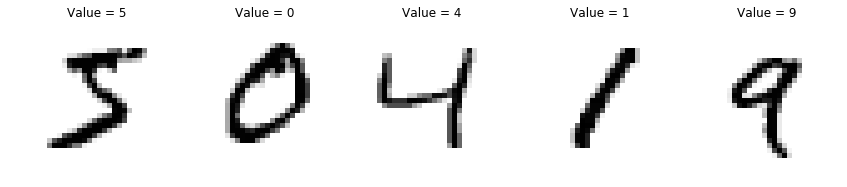

In [16]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Plotting numpy arrays as images using matplotlib
# show first 5 images in the training set
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_x[i].reshape((28, 28)), cmap=cm.gray_r) # use gray colormap
    plt.axis('off')
    plt.subplots_adjust(right = 2)
    plt.title('Value = %i' % train_y[i])
plt.show()

## Training the Neural Network

In [17]:
# import the algorithm
# Multi-layer Perceptron (MLP) is a supervised learning algorithm
# MLPClassifier implements a multi-layer perceptron (MLP) algorithm 
    # that trains using Backpropagation.
from sklearn.neural_network import MLPClassifier
# initialize the MLP classifier model with parameters
NN_classifier = MLPClassifier(hidden_layer_sizes=(3, 3, 3))
# train the model with the training set inputs and outputs 
NN_classifier.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
# Now lets predict test set using the NN_classifier
predicted_NN = NN_classifier.predict(test_x)

In [19]:
# Lets see the accuracy of the predictions 
    # and the overall performance metrics
from sklearn import metrics
print('Classification report for NN_classifier:\n %s\n\n%s\n'
      % (NN_classifier, metrics.classification_report(test_y, predicted_NN)))

Classification report for NN_classifier:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

             precision    recall  f1-score   support

          0       0.88      0.82      0.85       980
          1       0.91      0.95      0.93      1135
          2       0.80      0.77      0.79      1032
          3       0.74      0.82      0.78      1010
          4       0.77      0.71      0.74       982
          5       0.68      0.62      0.65       892
          6       0.89      0.89      0.89       958
          7       0.89      0.87      0.88      1028
          8       0.67      0.67      0.67

## Visualizing Predictions of MLP 

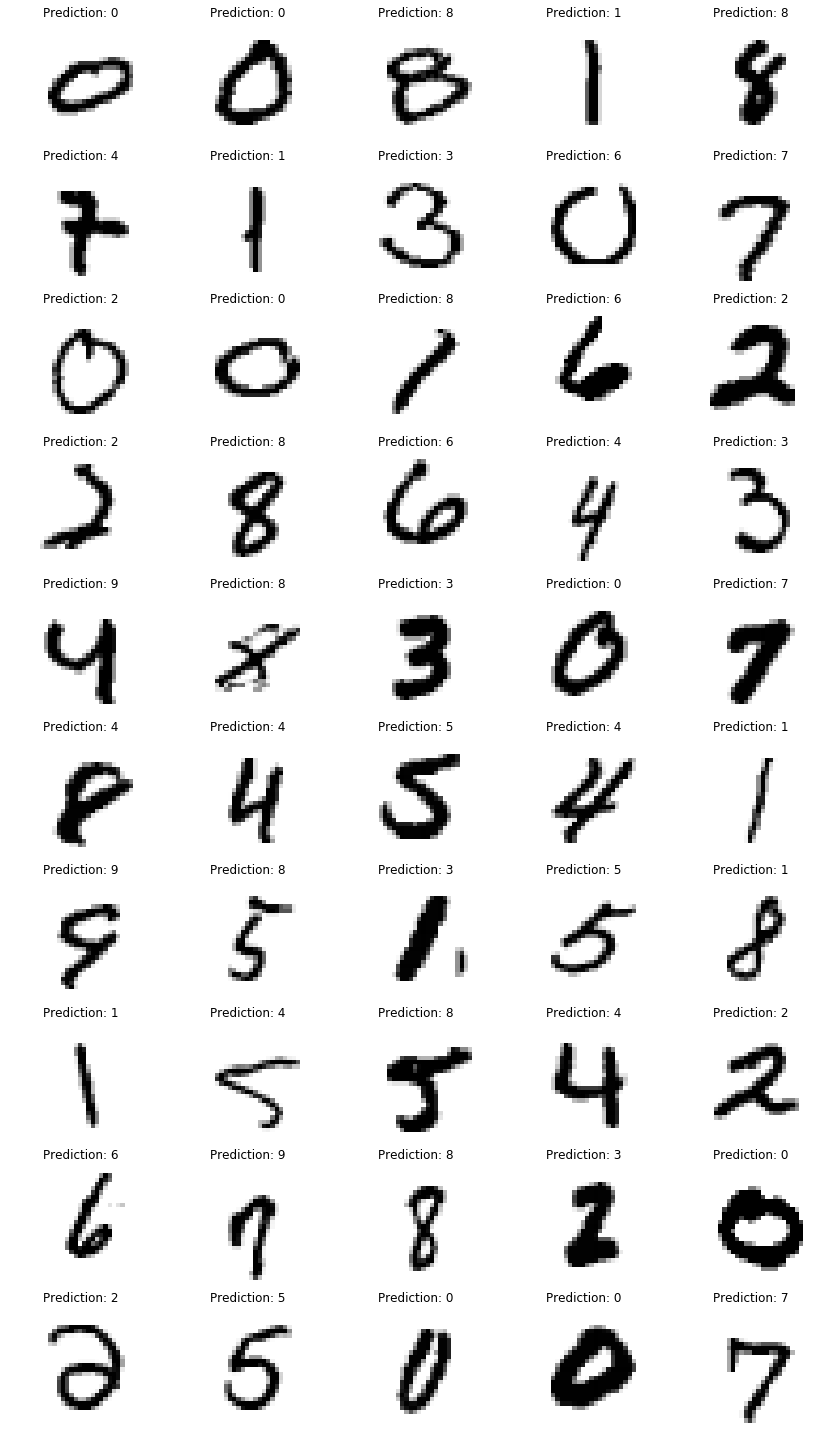

In [20]:
# lets see the 50 random images in the test set 
    # and their predicted value by NN model
import random
for i in range(0, 50):
    random_index = random.randint(0, len(test_x) - 1)
    plt.subplot(10, 5, i + 1)
    plt.imshow(test_x[random_index].reshape((28, 28)), cmap=cm.gray_r)
    plt.axis('off')
    plt.subplots_adjust(top = 5, right = 2)
    plt.title('Prediction: %i   ' % predicted_NN[random_index])
plt.show()

## Training the SVM

In [21]:
from sklearn import svm
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
no_images = len(train_x)
# since svm takes very long for large data sets we train only 
    # on the first 5000 images
reduced_training_set_x = train_x[0 : no_images // 10]
reduced_training_set_y = train_y[0 : no_images // 10]
# We learn the digits on the train set
classifier.fit(reduced_training_set_x, reduced_training_set_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# Now predict the value of the digit on the complete test set
predicted_SVM = classifier.predict(test_x)

In [23]:
# Lets see the accuracy of the predictions 
    # and the overall performance metrics
print("Classification report for SVM classifier: \n %s\n\n%s\n"
      % (classifier, metrics.classification_report(test_y, predicted_SVM)))

Classification report for SVM classifier: 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       980
          1       0.93      0.98      0.96      1135
          2       0.92      0.86      0.89      1032
          3       0.91      0.88      0.90      1010
          4       0.86      0.92      0.89       982
          5       0.87      0.88      0.87       892
          6       0.92      0.94      0.93       958
          7       0.92      0.89      0.90      1028
          8       0.89      0.84      0.87       974
          9       0.87      0.87      0.87      1009

avg / total       0.90      0.90      0.90     10000




## Visualizing Predictions of SVM

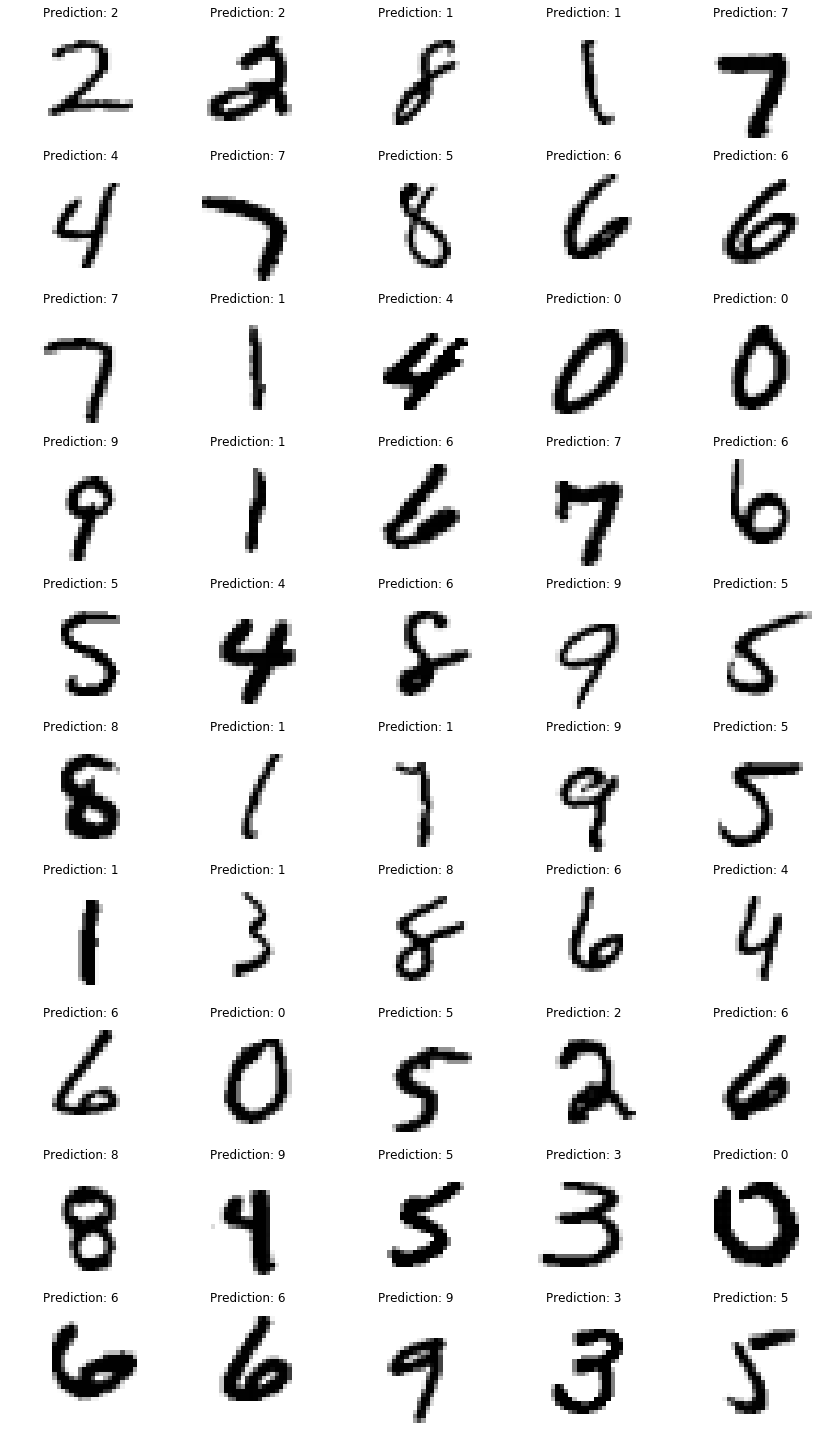

In [24]:
# lets see the 50 random images in the test set 
    # and their predicted value by SVM model
for i in range(0, 50):
    random_index = random.randint(0, len(test_x) - 1)
    plt.subplot(10, 5, i + 1)
    plt.imshow(test_x[random_index].reshape((28, 28)), cmap=cm.gray_r)
    plt.axis('off')
    plt.subplots_adjust(top = 5, right = 2)
    plt.title('Prediction: %i   ' % predicted_SVM[random_index])
plt.show()

## Final results and observations

* MLP Classifier a type of Neural Network works well if the hidden layer size is high.
* As the hidden layers increase so does the training time for the model.
* SVM cannot handle large training data sets in reasonable time.
* SVM can predict accurately using small training data.
* MLP requires more training data for accurate predictions.
* The performance and accuracy of both models depends heavily on the hyper parameters used and the training data size.